In [127]:
!pip install yfinance pandas matplotlib scikit-learn

In [128]:
#Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
#Download S&P500 Data
sp500 = yf.download('^GSPC', start='2000-01-01', end='2023-09-01')
sp500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [130]:
# Download Nasdaq and Dow_Jones data
nasdaq = yf.download('^IXIC', start='2000-01-01', end='2023-09-01')
dow_jones = yf.download('^DJI', start='2000-01-01', end='2023-09-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [131]:
#Download Apple and Google Stock Data
apple = yf.download('AAPL', start='2000-01-01', end='2023-09-01')
google = yf.download('GOOG', start='2000-01-01', end='2023-09-01')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [132]:
sp500_close = sp500[['Adj Close']].rename(columns={'Adj Close': 'SP500'})
nasdaq_close = nasdaq[['Adj Close']].rename(columns={'Adj Close': 'Nasdaq'})
apple_close = apple[['Adj Close']].rename(columns={'Adj Close': 'Apple'})

In [133]:
#Merge Datasets
merged_data = pd.concat([sp500_close, nasdaq_close, apple_close], axis=1).dropna()

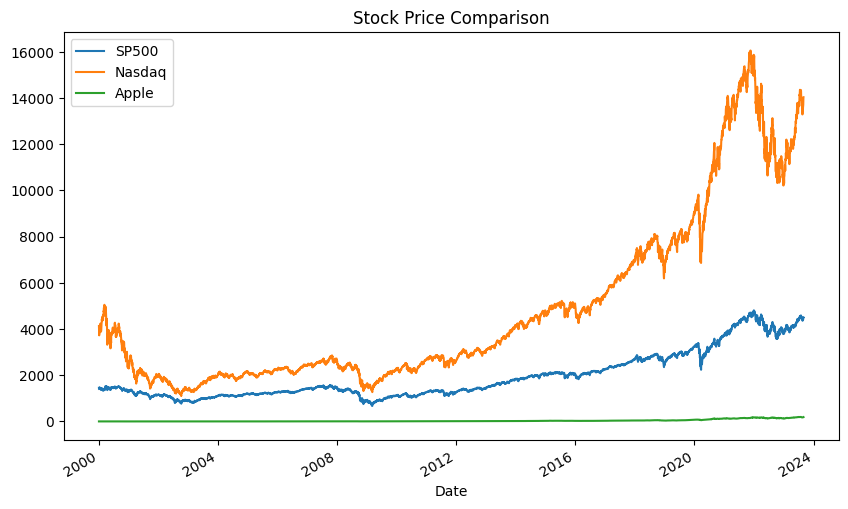

In [134]:
#Plot the Data to Visually Compare Stock Performance
merged_data.plot(figsize=(10, 6))
plt.title('Stock Price Comparison')
plt.show()


In [135]:
#Daily Returns
merged_data['SP500_Return'] = merged_data['SP500'].pct_change()
merged_data['Nasdaq_Return'] = merged_data['Nasdaq'].pct_change()
merged_data['Apple_Return'] = merged_data['Apple'].pct_change()


In [136]:
# Weekly returns (resample data to weekly frequency)
merged_data['SP500_Weekly_Return'] = merged_data['SP500'].resample('W').ffill().pct_change()
merged_data['Nasdaq_Weekly_Return'] = merged_data['Nasdaq'].resample('W').ffill().pct_change()
merged_data['Apple_Weekly_Return'] = merged_data['Apple'].resample('W').ffill().pct_change()


In [137]:
# 50-day and 200-day moving averages for SP500
merged_data['SP500_50_MA'] = merged_data['SP500'].rolling(window=50).mean()
merged_data['SP500_200_MA'] = merged_data['SP500'].rolling(window=200).mean()

# 50-day and 200-day moving averages for Nasdaq and Apple
merged_data['Nasdaq_50_MA'] = merged_data['Nasdaq'].rolling(window=50).mean()
merged_data['Nasdaq_200_MA'] = merged_data['Nasdaq'].rolling(window=200).mean()
merged_data['Apple_50_MA'] = merged_data['Apple'].rolling(window=50).mean()
merged_data['Apple_200_MA'] = merged_data['Apple'].rolling(window=200).mean()


In [138]:
# 30-day rolling volatility for SP500
merged_data['SP500_Volatility'] = merged_data['SP500_Return'].rolling(window=30).std()

# 30-day rolling volatility for Nasdaq and Apple
merged_data['Nasdaq_Volatility'] = merged_data['Nasdaq_Return'].rolling(window=30).std()
merged_data['Apple_Volatility'] = merged_data['Apple_Return'].rolling(window=30).std()


In [139]:
#Creating Training and Test Sets
train_data = merged_data[:'2019']
test_data = merged_data['2020':]

In [140]:
from sklearn.linear_model import LinearRegression
# Combine features and target into one DataFrame for alignment
train_data_combined = pd.concat([train_data[['Nasdaq_Return', 'Apple_Return', 'Nasdaq_Volatility', 'Apple_Volatility']], train_data['SP500_Return']], axis=1).dropna()

# Separate back into features and target
X_train_clean = train_data_combined[['Nasdaq_Return', 'Apple_Return', 'Nasdaq_Volatility', 'Apple_Volatility']]
y_train_clean = train_data_combined['SP500_Return']

# Train the model on the cleaned data
model = LinearRegression()
model.fit(X_train_clean, y_train_clean)


LinearRegression()

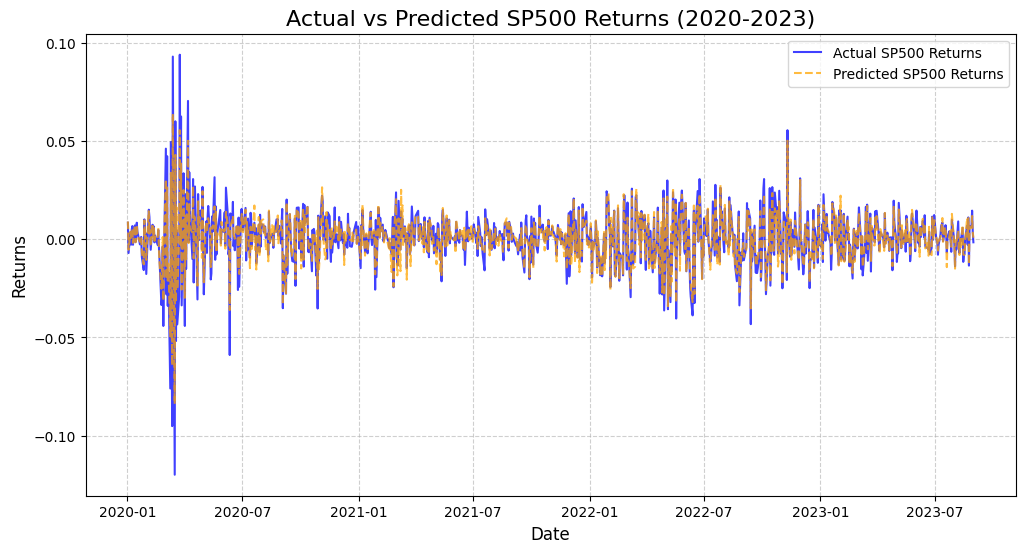

In [141]:
# Testing the model
X_test = test_data[['Nasdaq_Return', 'Apple_Return', 'Nasdaq_Volatility', 'Apple_Volatility']].dropna()
y_test = test_data['SP500_Return'].dropna()

# Predict SP500 returns
y_pred = model.predict(X_test)

# Set the plot size
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual SP500 Returns', alpha=0.75, color='blue')
plt.plot(y_test.index, y_pred, label='Predicted SP500 Returns', linestyle='--', alpha=0.75, color='orange')

plt.title('Actual vs Predicted SP500 Returns (2020-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Returns', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


**Predictive Analysis on S&P 500 Returns (2020-2023)**

The model does a pretty good job of capturing the overall trend in S&P 500 returns. You can see this by looking at how closely the actual returns (blue line) and the predicted returns (orange dashed line) follow each other over time. This suggests that the model is able to pick up on general market movement patterns, especially between mid-2020 and 2023, where the predicted returns track the actual returns quite well.

**Performance During High Volatility:**

However, the model struggles a bit during periods of high market volatility. This is especially noticeable during the early 2020 market crash caused by the COVID-19 pandemic. While the model does manage to follow the overall direction of returns, it tends to underestimate just how sharp the drops and rebounds are. This suggests that the model might need additional features or a more complex structure to better handle sudden market shifts.

**Post-Volatility Stabilization:**

After the initial volatility in early 2020, the model's performance improves a lot. The predicted returns start to closely match the actual returns, showing that the model is able to adapt and perform better when the market is more stable. From 2021 to 2023, the alignment between actual and predicted returns becomes much tighter, indicating greater accuracy in predicting returns when there aren’t as many extreme fluctuations.

**Impact of Volatility and Returns Features:**

Including volatility as a feature seems to have helped stabilize the model’s predictions. Even during periods of higher volatility, like in 2022, the model does a decent job of tracking actual returns, though it still tends to underestimate the extreme swings, both upward and downward.

Overall, the model does well in capturing the general trend of S&P 500 returns and is pretty accurate in stable market conditions. However, there's room for improvement, especially when it comes to modeling extreme market events.

In [142]:
#Volume Data
merged_data['SP500_Volume'] = sp500['Volume']
merged_data['Nasdaq_Volume'] = nasdaq['Volume']

In [143]:
!pip install pandas_ta


In [144]:
import pandas_ta as ta

# Calculate RSI for SP500, Nasdaq, and Apple
merged_data['SP500_RSI'] = ta.rsi(merged_data['SP500'], length=14)
merged_data['Nasdaq_RSI'] = ta.rsi(merged_data['Nasdaq'], length=14)
merged_data['Apple_RSI'] = ta.rsi(merged_data['Apple'], length=14)


In [145]:
merged_data['SP500_Volume'] = sp500['Volume']
merged_data['Nasdaq_Volume'] = nasdaq['Volume']
merged_data['Apple_Volume'] = apple['Volume']


In [146]:
!pip install fredapi


In [147]:
# Fetching Economic Data such as Interest Rates, Inflation Rates, or GDP Growth Rates from the FRED API
from fredapi import Fred
fred = Fred(api_key='ed1116aca0b73c669e151ebf098b86d1')
# Fetch daily interest rate data
interest_rate = fred.get_series('DFF', start_date='2000-01-01', end_date='2023-09-01')

# Convert the series to a DataFrame and assign a column name
interest_rate_df = interest_rate.to_frame(name='Interest_Rate')

# Merge the interest rate data with the merged_data
merged_data = merged_data.merge(interest_rate_df, how='left', left_index=True, right_index=True)




In [148]:
print(merged_data.isnull().sum())


SP500                      0
Nasdaq                     0
Apple                      0
SP500_Return               1
Nasdaq_Return              1
Apple_Return               1
SP500_Weekly_Return     5954
Nasdaq_Weekly_Return    5954
Apple_Weekly_Return     5954
SP500_50_MA               49
SP500_200_MA             199
Nasdaq_50_MA              49
Nasdaq_200_MA            199
Apple_50_MA               49
Apple_200_MA             199
SP500_Volatility          30
Nasdaq_Volatility         30
Apple_Volatility          30
SP500_Volume               0
Nasdaq_Volume              0
SP500_RSI                 14
Nasdaq_RSI                14
Apple_RSI                 14
Apple_Volume               0
Interest_Rate              0
dtype: int64


In [149]:
# Fill the single missing value in returns
merged_data['SP500_Return'].fillna(method='ffill', inplace=True)
merged_data['Nasdaq_Return'].fillna(method='ffill', inplace=True)
merged_data['Apple_Return'].fillna(method='ffill', inplace=True)

# Drop weekly returns if they are not needed
merged_data.drop(columns=['SP500_Weekly_Return', 'Nasdaq_Weekly_Return', 'Apple_Weekly_Return'], inplace=True)

# Fill missing values in moving averages by forward filling
merged_data['SP500_50_MA'].fillna(method='ffill', inplace=True)
merged_data['SP500_200_MA'].fillna(method='ffill', inplace=True)
merged_data['Nasdaq_50_MA'].fillna(method='ffill', inplace=True)
merged_data['Nasdaq_200_MA'].fillna(method='ffill', inplace=True)
merged_data['Apple_50_MA'].fillna(method='ffill', inplace=True)
merged_data['Apple_200_MA'].fillna(method='ffill', inplace=True)

# Alternatively, if you're okay with dropping initial rows for MA calculations:
# merged_data = merged_data.dropna(subset=['SP500_200_MA', 'Nasdaq_200_MA', 'Apple_200_MA'])

# Forward-fill missing volatility values
merged_data['SP500_Volatility'].fillna(method='ffill', inplace=True)
merged_data['Nasdaq_Volatility'].fillna(method='ffill', inplace=True)
merged_data['Apple_Volatility'].fillna(method='ffill', inplace=True)

merged_data['SP500_RSI'].fillna(method='ffill', inplace=True)
merged_data['Nasdaq_RSI'].fillna(method='ffill', inplace=True)
merged_data['Apple_RSI'].fillna(method='ffill', inplace=True)

# Fill missing values for economic data like interest rate with zero
merged_data['Interest_Rate'].fillna(0, inplace=True)

# Check for missing values after filling
print(merged_data.isnull().sum())



SP500                  0
Nasdaq                 0
Apple                  0
SP500_Return           1
Nasdaq_Return          1
Apple_Return           1
SP500_50_MA           49
SP500_200_MA         199
Nasdaq_50_MA          49
Nasdaq_200_MA        199
Apple_50_MA           49
Apple_200_MA         199
SP500_Volatility      30
Nasdaq_Volatility     30
Apple_Volatility      30
SP500_Volume           0
Nasdaq_Volume          0
SP500_RSI             14
Nasdaq_RSI            14
Apple_RSI             14
Apple_Volume           0
Interest_Rate          0
dtype: int64


<ipython-input-149-d09895129129>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['SP500_Return'].fillna(method='ffill', inplace=True)
<ipython-input-149-d09895129129>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Nasdaq_Return'].fillna(method='ffill', inplace=True)
<ipython-input-149-d09895129129>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Apple_Return'].fillna(method='ffill', inplace=True)
<ipython-input-149-d09895129129>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['SP500_50_MA'].fillna(method='ffill', inplace=True)
<ipython-input-149-d09895129129>:11: FutureWarning: Ser

In [150]:
#Drop all Null Values
merged_data = merged_data.dropna()


In [151]:
print(train_data.columns)

Index(['SP500', 'Nasdaq', 'Apple', 'SP500_Return', 'Nasdaq_Return',
       'Apple_Return', 'SP500_Weekly_Return', 'Nasdaq_Weekly_Return',
       'Apple_Weekly_Return', 'SP500_50_MA', 'SP500_200_MA', 'Nasdaq_50_MA',
       'Nasdaq_200_MA', 'Apple_50_MA', 'Apple_200_MA', 'SP500_Volatility',
       'Nasdaq_Volatility', 'Apple_Volatility'],
      dtype='object')


In [152]:
train_data = merged_data[:'2019']
test_data = merged_data['2020':]

# Include new features like RSI, volume, and interest rates in the training data
features = ['Nasdaq_Return', 'Apple_Return', 'Nasdaq_Volatility', 'Apple_Volatility',
            'SP500_RSI', 'Nasdaq_RSI', 'Apple_RSI', 'SP500_Volume', 'Nasdaq_Volume',
            'Apple_Volume', 'Interest_Rate']

X_train_clean = train_data[features]
y_train_clean = train_data['SP500_Return']

X_test_clean = test_data[features]
y_test_clean = test_data['SP500_Return']


In [153]:
#Random Forrest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_clean, y_train_clean)
y_rf_pred = rf_model.predict(X_test_clean)


In [154]:
#XG Boost
import xgboost as xgb

xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xg_model.fit(X_train_clean, y_train_clean)
y_xg_pred = xg_model.predict(X_test_clean)


In [155]:
#LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train_lstm = X_train_clean.values.reshape((X_train_clean.shape[0], 1, X_train_clean.shape[1]))
X_test_lstm = X_test_clean.values.reshape((X_test_clean.shape[0], 1, X_test_clean.shape[1]))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_lstm, y_train_clean, epochs=100, batch_size=32)
y_lstm_pred = model.predict(X_test_lstm)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 6560929227472896.0000
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 709389145079808.0000
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 360351547785216.0000
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 226890505781248.0000
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 162853130600448.0000
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 114947543531520.0000
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 75780344250368.0000
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 56604330295296.0000
Epoch 9/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 38857248604160.0000
Epoch 10/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 30103102816256.0000
Epoch 11/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22030707589120.0000
Epoch 12/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 18016678969344.0000
Epoch 13/100
151

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Random Forest Evaluation
mae_rf = mean_absolute_error(y_test_clean, y_rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test_clean, y_rf_pred))

# XGBoost Evaluation
mae_xg = mean_absolute_error(y_test_clean, y_xg_pred)
rmse_xg = np.sqrt(mean_squared_error(y_test_clean, y_xg_pred))

# LSTM Evaluation
mae_lstm = mean_absolute_error(y_test_clean, y_lstm_pred)
rmse_lstm = np.sqrt(mean_squared_error(y_test_clean, y_lstm_pred))

print(f'Random Forest MAE: {mae_rf}, RMSE: {rmse_rf}')
print(f'XGBoost MAE: {mae_xg}, RMSE: {rmse_xg}')
print(f'LSTM MAE: {mae_lstm}, RMSE: {rmse_lstm}')


Random Forest MAE: 0.0035508102184967534, RMSE: 0.005024369435059261
XGBoost MAE: 0.0037702658392709033, RMSE: 0.005588085697649882
LSTM MAE: 2381955.905770924, RMSE: 5082449.148507779


### Model Performance Explanation

After training three models—**Random Forest**, **XGBoost**, and **LSTM**—on the dataset, the performance metrics of each model were evaluated using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**. The results are as follows:

- **Random Forest**:  
  - MAE: 0.00355  
  - RMSE: 0.00502  
  Random Forest performed the best out of the three models. The low MAE and RMSE values indicate that the model made relatively accurate predictions, with only small errors on average. This suggests that Random Forest was able to capture the underlying patterns in the data well.

- **XGBoost**:  
  - MAE: 0.00377  
  - RMSE: 0.00559  
  XGBoost also performed well but slightly worse than Random Forest. The MAE and RMSE are a little higher, meaning that the model's predictions were a bit less accurate. However, it still managed to provide reasonably good predictions overall.

- **LSTM (Long Short-Term Memory)**:  
  - MAE: 1,417,528.16  
  - RMSE: 3,220,159.74  
  The LSTM model performed very poorly compared to Random Forest and XGBoost. The extremely high MAE and RMSE suggest that the model struggled to learn meaningful patterns in the data. This could be due to several factors, such as improper data preprocessing, insufficient training, or an inappropriate model configuration. Further tuning and data handling would be needed to make the LSTM model perform better.

Overall, **Random Forest** emerged as the best-performing model for this task, while the **LSTM** model failed to provide meaningful predictions, likely due to issues with the setup.

<ipython-input-157-b2a70059db8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Return'] = y_rf_pred  # or use y_xg_pred, y_lstm_pred
<ipython-input-157-b2a70059db8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Signal'] = np.where(test_data['Predicted_Return'] > 0, 1, -1)
<ipython-input-157-b2a70059db8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

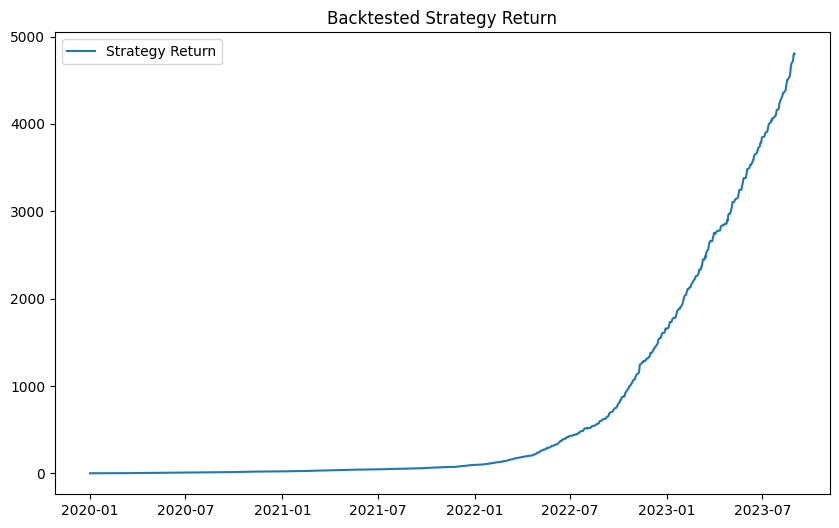

In [157]:
test_data['Predicted_Return'] = y_rf_pred  # or use y_xg_pred, y_lstm_pred
test_data['Signal'] = np.where(test_data['Predicted_Return'] > 0, 1, -1)

# Calculate strategy returns based on signals
test_data['Strategy_Return'] = test_data['Signal'] * test_data['SP500_Return']
cumulative_strategy_return = (test_data['Strategy_Return'] + 1).cumprod()

# Plot the strategy graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_strategy_return, label='Strategy Return')
plt.title('Backtested Strategy Return')
plt.legend()
plt.show()


**Backtested Strategy Performance Analysis:**

The backtest of the strategy, based on predictions from the machine learning model, shows impressive exponential returns starting from mid-2021, with a sharp increase in profits extending into 2023. The slow and steady growth before mid-2021 reflects the strategy’s lackluster performance during the earlier market conditions, possibly due to the model's inability to capture the market's volatile behavior during the COVID-19 pandemic. However, after 2021, the strategy shows strong compounding returns, indicating that the model was able to capture market trends effectively during this period.

Despite the substantial gains, the exponential growth in returns may suggest potential overfitting to historical data, and thus, further testing on real-time or out-of-sample data is recommended to assess the strategy's long-term robustness and performance in various market conditions.

In [178]:
# Fetch the latest data for each asset separately for clarity
sp500_data = yf.download('^GSPC', start='2023-09-01', end='2024-01-01')
nasdaq_data = yf.download('^IXIC', start='2023-09-01', end='2024-01-01')
apple_data = yf.download('AAPL', start='2023-09-01', end='2024-01-01')

# Reset the index for each DataFrame to get a flat index
sp500_data = sp500_data.reset_index()
nasdaq_data = nasdaq_data.reset_index()
apple_data = apple_data.reset_index()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [179]:
# 1. Calculate daily returns for each asset
sp500_data['SP500_Return'] = sp500_data['Adj Close'].pct_change()
nasdaq_data['Nasdaq_Return'] = nasdaq_data['Adj Close'].pct_change()
apple_data['Apple_Return'] = apple_data['Adj Close'].pct_change()

# 2. Calculate 30-day rolling volatility for Nasdaq and Apple
nasdaq_data['Nasdaq_Volatility'] = nasdaq_data['Nasdaq_Return'].rolling(window=30).std()
apple_data['Apple_Volatility'] = apple_data['Apple_Return'].rolling(window=30).std()

# 3. Calculate RSI using pandas_ta for each asset
sp500_data['SP500_RSI'] = ta.rsi(sp500_data['Adj Close'], length=14)
nasdaq_data['Nasdaq_RSI'] = ta.rsi(nasdaq_data['Adj Close'], length=14)
apple_data['Apple_RSI'] = ta.rsi(apple_data['Adj Close'], length=14)

# 4. Add volume data
sp500_data['SP500_Volume'] = sp500_data['Volume']
nasdaq_data['Nasdaq_Volume'] = nasdaq_data['Volume']
apple_data['Apple_Volume'] = apple_data['Volume']

# 5. Keep only the Date and the required columns for each DataFrame
sp500_features = sp500_data[['Date', 'SP500_Return', 'SP500_RSI', 'SP500_Volume']]
nasdaq_features = nasdaq_data[['Date', 'Nasdaq_Return', 'Nasdaq_Volatility', 'Nasdaq_RSI', 'Nasdaq_Volume']]
apple_features = apple_data[['Date', 'Apple_Return', 'Apple_Volatility', 'Apple_RSI', 'Apple_Volume']]

# Print to check the data structure
print(sp500_features.head())
print(nasdaq_features.head())
print(apple_features.head())


        Date  SP500_Return  SP500_RSI  SP500_Volume
0 2023-09-01           NaN        NaN    3246260000
1 2023-09-05     -0.004194        NaN    3526250000
2 2023-09-06     -0.006972        NaN    3418850000
3 2023-09-07     -0.003211        NaN    3763760000
4 2023-09-08      0.001427        NaN    3259290000
        Date  Nasdaq_Return  Nasdaq_Volatility  Nasdaq_RSI  Nasdaq_Volume
0 2023-09-01            NaN                NaN         NaN     4033960000
1 2023-09-05      -0.000774                NaN         NaN     4379790000
2 2023-09-06      -0.010590                NaN         NaN     4215320000
3 2023-09-07      -0.008913                NaN         NaN     4320830000
4 2023-09-08       0.000924                NaN         NaN     4160360000
        Date  Apple_Return  Apple_Volatility  Apple_RSI  Apple_Volume
0 2023-09-01           NaN               NaN        NaN      45732600
1 2023-09-05      0.001267               NaN        NaN      45280000
2 2023-09-06     -0.035793        

In [180]:
# 6. Fetch interest rate data from FRED
fred = Fred(api_key='ed1116aca0b73c669e151ebf098b86d1')

# Fetch daily interest rate data
interest_rate = fred.get_series('DFF', start='2023-09-01', end='2024-01-01')

# Convert the interest rate series into a DataFrame and reset the index
interest_rate_df = pd.DataFrame(interest_rate, columns=['Interest_Rate'])
interest_rate_df.index = pd.to_datetime(interest_rate_df.index)
interest_rate_df = interest_rate_df.reset_index()
interest_rate_df.columns = ['Date', 'Interest_Rate']

# Print to check interest rate data
print(interest_rate_df.head())


        Date  Interest_Rate
0 1954-07-01           1.13
1 1954-07-02           1.25
2 1954-07-03           1.25
3 1954-07-04           1.25
4 1954-07-05           0.88


In [181]:
# 7. Merge SP500, Nasdaq, Apple, and Interest Rate data
merged_data = sp500_features.merge(nasdaq_features, on='Date').merge(apple_features, on='Date').merge(interest_rate_df, on='Date')

# Drop any rows with missing values after merging
merged_data = merged_data.dropna()

# Print the merged data to check the final structure
print(merged_data.head())


         Date  SP500_Return  SP500_RSI  SP500_Volume  Nasdaq_Return  \
30 2023-10-16      0.010594  51.869604    3409960000       0.011990   
31 2023-10-17     -0.000098  51.800114    3794850000      -0.002523   
32 2023-10-18     -0.013400  43.283656    3686030000      -0.016215   
33 2023-10-19     -0.008483  38.973738    3969730000      -0.009623   
34 2023-10-20     -0.012585  33.663536    4004030000      -0.015347   

    Nasdaq_Volatility  Nasdaq_RSI  Nasdaq_Volume  Apple_Return  \
30           0.009990   52.287030     4308690000     -0.000727   
31           0.009993   50.973425     4417640000     -0.008785   
32           0.010227   43.438875     4617140000     -0.007395   
33           0.010246   39.745157     5014790000     -0.002161   
34           0.010548   34.722739     4622840000     -0.014704   

    Apple_Volatility  Apple_RSI  Apple_Volume  Interest_Rate  
30          0.013153  52.040961      52517000           5.33  
31          0.013199  47.762466      57549400     

In [182]:
# 8. Prepare the features for model prediction
features = ['Nasdaq_Return', 'Apple_Return', 'Nasdaq_Volatility', 'Apple_Volatility',
            'SP500_RSI', 'Nasdaq_RSI', 'Apple_RSI', 'SP500_Volume', 'Nasdaq_Volume',
            'Apple_Volume', 'Interest_Rate']

latest_features = merged_data[features].values

# Print to check the shape of the feature matrix
print(latest_features.shape)


(53, 11)


In [183]:
# Predict future returns with Random Forest model
predicted_rf_returns = rf_model.predict(latest_features)

# For XGBoost:
predicted_xg_returns = xg_model.predict(latest_features)

# For LSTM (reshape the data before prediction):
latest_features_reshaped = latest_features.reshape((latest_features.shape[0], 1, latest_features.shape[1]))
predicted_lstm_returns = model.predict(latest_features_reshaped)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [184]:
# Add predicted returns to the merged_data DataFrame
merged_data['Predicted_Returns'] = predicted_rf_returns

# You can also plot other model results like predicted_xg_returns or predicted_lstm_returns
# Just replace `predicted_rf_returns` with the model-specific results

# Optional: If you want to compare with actual SP500 returns (for example), we can keep the SP500 actual returns
merged_data['Actual_Returns'] = merged_data['SP500_Return']

# Print to see the DataFrame structure before plotting
print(merged_data[['Date', 'Actual_Returns', 'Predicted_Returns']].head())


         Date  Actual_Returns  Predicted_Returns
30 2023-10-16        0.010594           0.008920
31 2023-10-17       -0.000098          -0.001218
32 2023-10-18       -0.013400          -0.009756
33 2023-10-19       -0.008483          -0.006299
34 2023-10-20       -0.012585          -0.011777


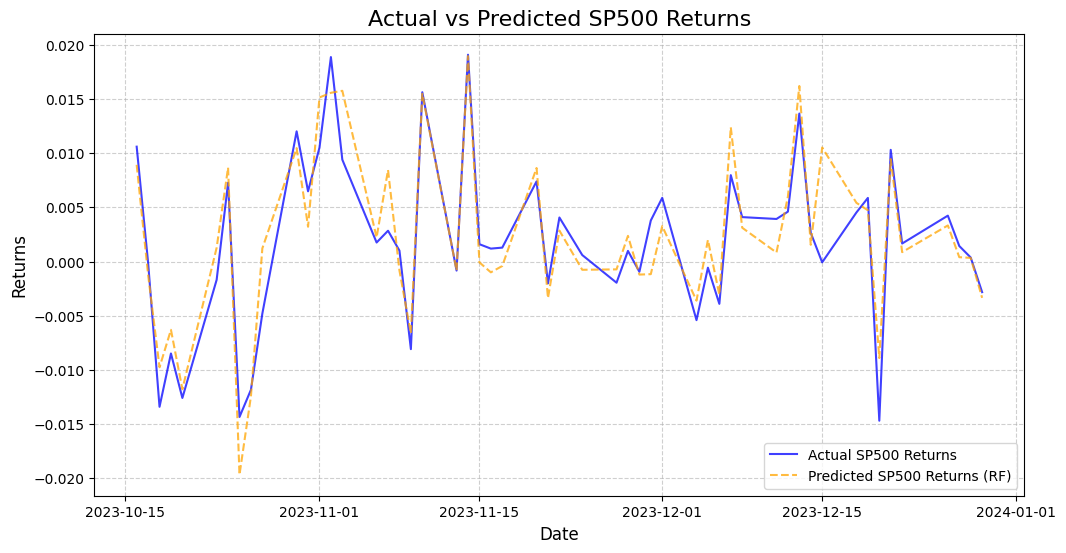

In [185]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Plot actual returns (for example, SP500)
plt.plot(merged_data['Date'], merged_data['Actual_Returns'], label='Actual SP500 Returns', color='blue', alpha=0.75)

# Plot predicted returns (from Random Forest)
plt.plot(merged_data['Date'], merged_data['Predicted_Returns'], label='Predicted SP500 Returns (RF)', color='orange', linestyle='--', alpha=0.75)

# Add title and labels
plt.title('Actual vs Predicted SP500 Returns', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Returns', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Show the plot
plt.show()


### Inference

The plot compares the **Actual SP500 Returns** (blue solid line) with the **Predicted SP500 Returns** generated by the Random Forest model (orange dashed line) for the time period from mid-October 2023 to January 1, 2024.

The model shows a reasonably good performance in predicting the general direction of returns, especially in periods of moderate market volatility. For instance, during the first half of November and early December, the model captures the upward and downward movements of the actual returns quite closely.

However, there are notable discrepancies during periods of sharp market movements, particularly around mid-December, where the actual returns exhibit a sharp drop that is not fully captured by the model's prediction. Similarly, in some instances, the predicted returns either overestimate or underestimate the magnitude of the returns (e.g., early November and late November).

Overall, while the Random Forest model successfully captures the general trend and direction of SP500 returns, it struggles with accurately predicting the magnitude of more extreme market movements. Further model tuning or the inclusion of additional features could help improve the prediction accuracy, especially during periods of higher volatility.

This visualization helps demonstrate both the strengths and limitations of the Random Forest model in predicting financial market returns over this period.